In [7]:
from bs4 import BeautifulSoup
import requests
import mysql.connector
from mysql.connector import errorcode

In [106]:
cnx = mysql.connector .connect(
    host = 'serverandres.c43rrwosnqfo.us-east-2.rds.amazonaws.com',
    user = 'owen_peng',
    password = 'Peng1234!'
)

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
body = soup.tbody

In [67]:
rows = body.find_all(class_="css-78jh1y")

In [71]:
rows[0].text

'The Carmichael Show'

In [77]:
page = requests.get('https://reelgood.com/tv/source/hulu?filter-genre=13&filter-sort=1&offset=150')
soup = BeautifulSoup(page.content, 'html.parser')


In [73]:
def get_names(url):   
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    pictures = soup.tbody.find_all(class_="css-78jh1y")
    show_names = []
    for i in pictures:
        show_name = i.text
        show_names.append(show_name)
    return show_names

In [77]:
action = get_names('https://reelgood.com/tv/source/hulu?filter-genre=5&filter-sort=2')

In [13]:
api_key = '9cd2dde4'
url = 'http://www.omdbapi.com/?apikey=9cd2dde4&'

In [78]:
action[0]

'Rick and Morty'

In [3]:
def api_call(l):
    raw_show_data = []
    for i in range(0,len(l)):
        params = {'s':l[i]}
        response = requests.get(url, params=params)
        data = response.json()
        raw_show_data.append(data)
    return raw_show_data

In [4]:
def parse_raw_data(l,genre):
    parsed_data = []
    for i in l:
        if i['Response'] == 'False':
            continue
        else:
            try:
                movie_tuple = (i['Search'][0]['Title'],i['Search'][0]['Year'].split("–")[0],i['Search'][0]['imdbID'],genre)
            except:
                movie_tuple = (i['Search'][0]['Title'],i['Search'][0]['Year'],i['Search'][0]['imdbID'],genre)
            parsed_data.append(movie_tuple)
    return parsed_data

In [5]:
def db_entry(l,genre):
    raw_data = api_call(l)
    parsed_data = parse_raw_data(raw_data,genre)
    stmt = """INSERT INTO Hulu (Name, Start_Year, imdbID, Genre) VALUES (%s, %s, %s, %s)"""
    cursor.executemany(stmt, parsed_data)
    cnx.commit()

In [97]:
action = get_names('https://reelgood.com/tv/source/hulu?filter-genre=5&offset=100')

In [98]:
db_entry(action, 'Action')

In [100]:
animation = get_names('https://reelgood.com/tv/source/hulu?filter-genre=6')

In [ ]:
db_entry(animation, 'Animation')

In [107]:
cursor = cnx.cursor()

In [108]:
cursor.execute('''USE TVSHOWS''')

In [91]:
create=  (  "CREATE TABLE Hulu ("
        "  id int NOT NULL AUTO_INCREMENT,"
        "  Name varchar(100),"
        "  Start_Year int,"
        "  imdbID varchar(50) NOT NULL,"
        "  genre varchar(50),"  
        "  PRIMARY KEY (iD)"
        ") ENGINE=InnoDB")
cursor.execute(create)

In [21]:
anime = get_names('https://reelgood.com/tv/source/hulu?filter-genre=39&filter-sort=1&offset=100')

In [22]:
db_entry(anime, 'Anime')

In [26]:
kids = get_names('https://reelgood.com/tv/source/hulu?filter-genre=8&filter-sort=1&offset=50')

In [27]:
db_entry(kids, 'Kids')

In [37]:
comedy = get_names('https://reelgood.com/tv/source/hulu?filter-genre=9&filter-sort=1&offset=200')

In [38]:
db_entry(comedy, 'Comedy')

In [45]:
crime = get_names('https://reelgood.com/tv/source/hulu?filter-genre=10&filter-sort=1&offset=150')

In [46]:
db_entry(crime, 'Crime')

In [53]:
documentary = get_names('https://reelgood.com/tv/source/hulu?filter-genre=11&filter-sort=1&offset=150')

In [54]:
db_entry(documentary, 'Documentary')

In [61]:
drama = get_names('https://reelgood.com/tv/source/hulu?filter-genre=3&filter-sort=1&offset=150')

In [62]:
db_entry(drama, 'Drama')

In [78]:
fantasy = get_names('https://reelgood.com/tv/source/hulu?filter-genre=13&filter-sort=1&offset=100')

In [71]:
db_entry(fantasy, 'Fantasy')

In [79]:
horror = get_names('https://reelgood.com/tv/source/hulu?filter-genre=19&filter-sort=1')

In [80]:
db_entry(horror, 'Horror')

In [83]:
mystery = get_names('https://reelgood.com/tv/source/hulu?filter-genre=23&filter-sort=1&offset=50')

In [84]:
db_entry(mystery, 'Mystery')

In [91]:
reality = get_names('https://reelgood.com/tv/source/hulu?filter-genre=25&filter-sort=1&offset=150')

In [93]:
db_entry(reality, 'Reality')

### Working with database data

In [137]:
cursor.execute('''SELECT AVG(all_all_ages), genre FROM TVSHOWS.RATINGS JOIN TVSHOWS.Netflix USING(imdbID) GROUP BY genre''')
all_ages = cursor.fetchall()

In [149]:
cursor.execute('''DESCRIBE TVSHOWS.RATINGS''')
columns = cursor.fetchall()

InternalError: Unread result found

In [138]:
all_ages

[(7.799999952316284, 'Action'),
 (7.842857156481061, 'Anime'),
 (8.142857006617955, 'British'),
 (8.010526330847489, 'Comedy'),
 (7.8615384835463304, 'Crime'),
 (7.0, 'Cult_Classic'),
 (8.200000047683716, 'Documentary'),
 (8.252941243788776, 'Drama'),
 (7.063636346296831, 'Fantasy'),
 (7.349999904632568, 'Horror'),
 (8.483783825023755, 'International'),
 (7.749999940395355, 'Kids'),
 (7.346666653951009, 'Korean'),
 (7.388888941870795, 'Mystery'),
 (7.499999926640437, 'Reality'),
 (8.29090911691839, 'Romance'),
 (7.483333309491475, 'Science'),
 (7.6916667222976685, 'Spanish'),
 (7.0600001335144045, 'Standup'),
 (7.679999987284343, 'Teen'),
 (7.725000083446503, 'Thriller')]

In [139]:
def bar_y_values(l):
    y = []
    for i in l:
        y_value = i[0]
        y.append(y_value)
    return y
        
        

In [140]:
def bar_x_values(l):
    x = []
    for i in l:
        x_value = i[1]
        x.append(x_value)
    return x

In [141]:
bar_y_values(all_ages)

[7.799999952316284,
 7.842857156481061,
 8.142857006617955,
 8.010526330847489,
 7.8615384835463304,
 7.0,
 8.200000047683716,
 8.252941243788776,
 7.063636346296831,
 7.349999904632568,
 8.483783825023755,
 7.749999940395355,
 7.346666653951009,
 7.388888941870795,
 7.499999926640437,
 8.29090911691839,
 7.483333309491475,
 7.6916667222976685,
 7.0600001335144045,
 7.679999987284343,
 7.725000083446503]

In [128]:
bar_x_values(all_ages)

['Action',
 'Anime',
 'British',
 'Comedy',
 'Crime',
 'Cult_Classic',
 'Documentary',
 'Drama',
 'Fantasy',
 'Horror',
 'International',
 'Kids',
 'Korean',
 'Mystery',
 'Reality',
 'Romance',
 'Science',
 'Spanish',
 'Standup',
 'Teen',
 'Thriller']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

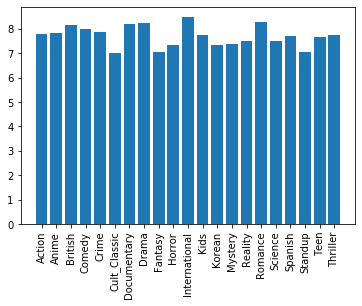

In [147]:
plt.bar(x = bar_x_values(all_ages), height=bar_y_values(all_ages))
plt.xticks( rotation='vertical')